In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"C:\Users\Ansh Gupta\Downloads\retail_stor\retail_store_sales.csv")
dataset.head(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [4]:
dataset.shape

(12575, 11)

In [5]:
dataset.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [6]:
dataset.isnull().sum().sum()

np.int64(7229)

In [7]:
(dataset.isnull().sum()/dataset.shape[0])*100

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [8]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(5.226097957708296)

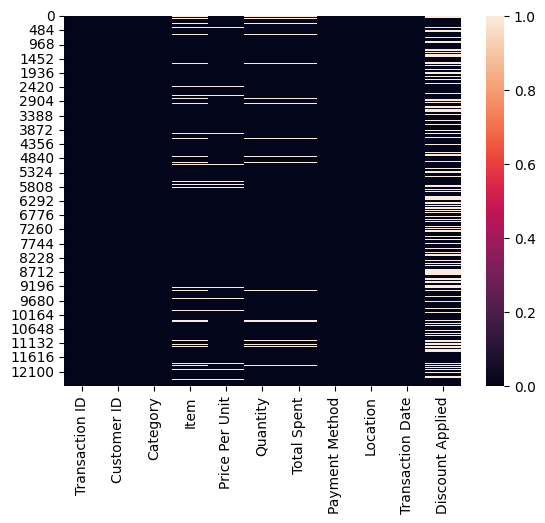

In [9]:
sns.heatmap(dataset.isnull())
plt.show()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [11]:
dataset["Discount Applied"] = dataset["Discount Applied"].astype(str).fillna("Unknown")

In [12]:
dataset["Discount Applied"] = dataset["Discount Applied"].replace("nan","Unknown")

In [13]:
dataset.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


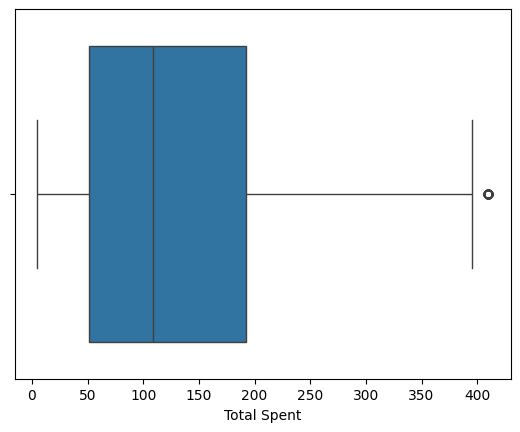

In [15]:
sns.boxplot(x = 'Total Spent',data=dataset)
plt.show()

In [16]:
Q1 = dataset['Total Spent'].quantile(0.25)
Q3 = dataset['Total Spent'].quantile(0.75)
IQR = Q3-Q1
IQR

np.float64(141.0)

In [17]:
Min_Range = Q1 - (1.5 * IQR)
Max_Range = Q3 + (1.5* IQR)
Min_Range, Max_Range

(np.float64(-160.5), np.float64(403.5))

In [18]:
dataset['Total Spent'] = np.where(dataset['Total Spent'] > Max_Range, Max_Range, dataset['Total Spent'])

In [19]:
dataset['Total Spent'] = dataset['Total Spent'].fillna(dataset['Total Spent'].median())

In [20]:
dataset['Quantity'] = dataset['Quantity'].fillna(dataset['Quantity'].mean())

In [21]:
dataset['Price Per Unit'] = dataset['Price Per Unit'].fillna(dataset['Price Per Unit'].mean())

In [22]:
category_counts = dataset.groupby('Category')['Item'].apply(lambda x : x.mode()[0] if not x.mode().empty else 'Unknown' )

In [23]:
dataset['Item'] = dataset['Item'].fillna(dataset['Category'].map(category_counts))

In [24]:
groupwise_item = dataset.groupby('Category')['Item'].count()
groupwise_item

Category
Beverages                             1567
Butchers                              1568
Computers and electric accessories    1558
Electric household essentials         1591
Food                                  1588
Furniture                             1591
Milk Products                         1584
Patisserie                            1528
Name: Item, dtype: int64

In [25]:
dataset.shape

(12575, 11)

In [26]:
dataset = dataset.drop_duplicates()

In [27]:
dataset.shape

(12575, 11)

In [30]:
dataset.head(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,Unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
